# HW10 - GC & HPLC Simulation

In [1]:
# imports
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [9, 6]
matplotlib.rcParams['font.size'] = 11
import numpy as np

In this homework, you should assume a Gaussian peak shape given by the expression

\begin{equation}\Large
y = \frac{1}{\sigma \sqrt{2 \pi}} e^{- \frac{(x-x_0)^2}{2 \sigma^2}}
\end{equation}

where $x_0$ is the center of the peak and $\sigma$ is the standard deviation.

## 1
Construct a simulation of an open tubular capillary GC using the parameters described below:

| Name                            | Value                                |
| ------------------------------- | ------------------------------------ |
| Inside wall diameter            | 200 $\mu$                            |
| Stationary phase film thickness | 0.1 $\mu$                            |
| $\gamma$, Obstruction factor    | 1                                    |
| $q$, Shape factor               | 2/3 (for films)                      |
| $D_m$                           | 0.1 cm<sup>2</sup> sec<sup>-1</sup>  |
| $D_s$                           | 0.05 cm<sup>2</sup> sec<sup>-1</sup> |

There are three components labeled A, B, and C. At 250&deg;C, the partition coefficients are 10<sup>3</sup>, 1.01x10<sup>3</sup>, and 10<sup>4</sup> for components A, B, and C, respectively. Their relative concentrations are 21%, 38%, and 50%, respectively. Design your G.C. so it provides a 10 minute retion time for component A. Assume that your eddy diffusion term (the A term in the van Deemter equation) is zero for a capillary column. The B and C terms in the van Deemter equation are:

\begin{equation}\Large
B = 2 \gamma D_m
\end{equation}

\begin{equation}\Large
C = C_s + C_m
\end{equation}

\begin{equation}\Large
C_s = q \frac{k^\prime}{(1+k^\prime)^2} \frac{d_f^2}{D_s}
\end{equation}

\begin{equation}\Large
C_m = \frac{1+6k^\prime+11k^{\prime 2}}{96(1+k^\prime)^2D_m} d_c^2
\end{equation}

## 1a
Find the following:

| Parameter                              | Value                    |
| -------------------------------------- | ------------------------ |
| $\beta$                                | 500                      |
| $k_A^\prime, k_B^\prime, k_C^\prime$   | 2, 2.02, 20              |
| $\mu_{\mathrm{optimum}}$               | 27.5 cm sec<sup>-1</sup> |
| $L$                                    | 55 m                     |
| $N$                                    | 379,000                  |
| $t_m$                                  | 200 sec                  |
| Flow velocity for A                    | 9.2 cm sec<sup>-1</sup>  |
| Resolution for A & B                   | 1.02                     |
| Physical width of peaks A & C          |                          |
| Temporal width of peaks A & C          |                          |
| Ratio of retention time to peak width  | 615                      |

In [2]:
# Constants
gamma = 1.0
q = 2.0/3.0
D_m = 0.1
D_s = 0.05
part = np.array([1.0e3, 1.01e3, 1.0e4])
d_f = 0.1e-4 # cm
d_c = 200e-4 # cm 

Beta = d_c/(4.0*d_f)
print Beta
k_prime = part/Beta
print k_prime

# van Deemter Equation
B = 2.0*gamma*D_m
C_s = q*k_prime/(1.0+k_prime)**2*d_f**2/D_s
C_m = (1.0+6.0*k_prime+11.0*k_prime**2)/(96.0*(1+k_prime)**2*D_m)*d_c**2
C = C_s + C_m

u = np.sqrt(B/C) # cm s-1
print u

H = B/u + C*u

t_m = 10.0*60.0/(1+k_prime[0])
print t_m
t_R = t_m*(1+k_prime)
L = t_m*u
print L
N = L/H
print N

sigma_x = np.sqrt(H*L)
sigma_t = t_R/np.sqrt(N)
print sigma_x
print sigma_t

500.0
[  2.     2.02  20.  ]
[ 27.52987261  27.47241575  21.63827466]
200.0
[ 5505.97452182  5494.48315075  4327.65493264]
[ 378946.94293677  377366.81367291  234107.46520045]
[ 8.94427191  8.94427191  8.94427191]
[ 0.97467998  0.98322992  8.68043839]


## 1b
Simulate a chromatogram that shows the correct retention times and widths for A, B, and C as well as the void volume (i.e. the unretained peak).

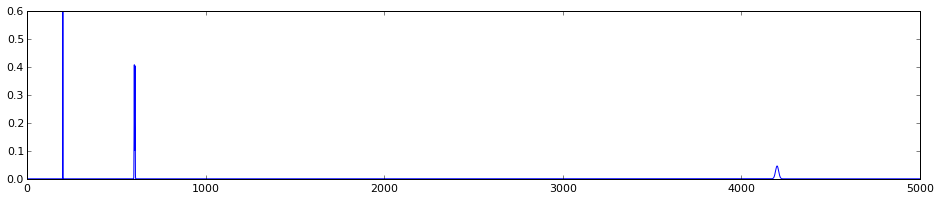

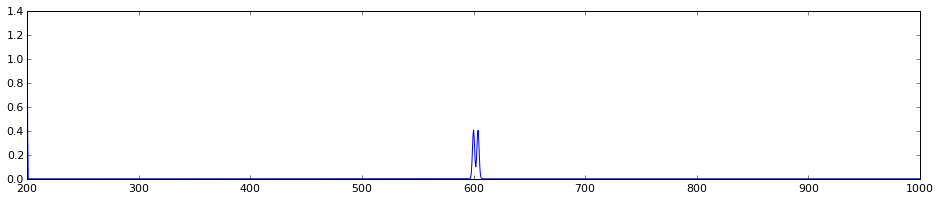

In [4]:
t = np.linspace(0,5000,10000)

t_R = t_R.reshape(3,1)
sigma_t = sigma_t.reshape(3,1)

y = 1.0/(sigma_t*np.sqrt(2.0*np.pi))*np.exp(-(t-t_R)**2/(2.0*sigma_t**2))

sigma_t_void = t_m/np.sqrt(N[0])
y_void = 1.0/(sigma_t_void*np.sqrt(2.0*np.pi))*np.exp(-(t-t_m)**2/(2.0*sigma_t_void**2))

chrom = np.sum(y,axis=0)+y_void

fig = plt.figure(figsize=[16, 3])
plt.ylim([0,0.6])
plt.plot(t,chrom)

fig = plt.figure(figsize=[16, 3])
plt.plot(t[400:2000],chrom[400:2000])

## 1c
Create a similar van Deemter plot that can be used to determine the best column diameter. Discuss how column diameter is chosen based on your plot. Is it defined by the column parameters or is it defined by practical limitations? What physical process controls the optimum column diameter.

(3L, 40L)
The best column diameter is where H is minimized, so that the peak widths will become narrow.
The column diameter is in reality controlled physically because the back pressure in the line will become very large
as we approach very small diameters


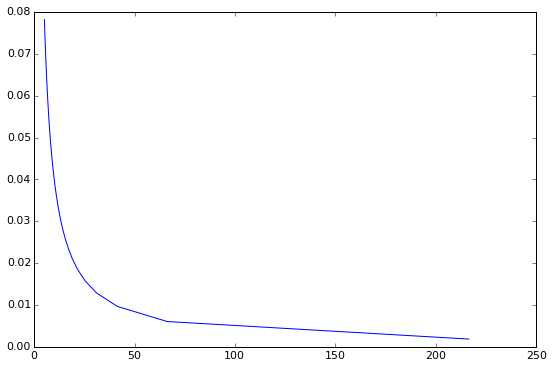

In [12]:
d_c = np.linspace(200e-5,200e-3,40) # cm variable column diameter

# van Deemter Equation
part2 = part.reshape(3,1)
Beta = d_c/(4.0*d_f)
k_prime = part2/Beta

# van Deemter Equation
B = 2.0*gamma*D_m
C_s = q*k_prime/(1.0+k_prime)**2*d_f**2/D_s
C_m = (1.0+6.0*k_prime+11.0*k_prime**2)/(96.0*(1+k_prime)**2*D_m)*d_c**2
C = C_s + C_m

u = np.sqrt(B/C) # cm s-1

H = B/u + C*u

# width = c*sqrt(H)
plt.plot(u[0,:],H[0,:])
    
print "The best column diameter is where H is minimized, so that the peak widths will become narrow."
print "The column diameter is in reality controlled physically because the back pressure in the line will become very large"
print "as we approach very small diameters"

## 2
Create a simulation that shows the reverse phase chromatogram of a sample containing 9 different components. You will create a graph where the x axis is time and the y axis is analyte concentration. Water is the primary solvent (A) and THF is the secondary solvent (B). If $\phi$ is the volume fraction of THF relative to water, the capacity factor for a binary solvent system is described by the equation:

\begin{equation}\Large
k^\prime = k_w^\prime 10^{-S \phi}
\end{equation}

where $k_w^\prime$ and $S$ are constants for each component. Thus, $k^\prime$ becomes $k_w^\prime$ for a water mobile phase where $\phi = 0$. The $\phi$ values refer to a particular binary system so 40% THF and 60% H<sub>2</sub>O would correspond to $\phi=0.40$. If one mixes one binary mixture with another, there will be $\phi$ values for each binary system and the $k^\prime$ value for the mixture will be roughly the average of the two. We label the 2 binary systems 1 and 2 and the relative fraction of each one is $c_1$ and $c_2$ so $c_1$ and $c_2$ add to one, $c2+c2=1$. The net $k^\prime$ value will then be:

\begin{equation}\Large
k^\prime = k_w^\prime \left(\frac{c_1 10^{-S_1\phi_1}+c_2 10^{-S_2 \theta_2}}{c_1 + c_2}\right)
\end{equation}

The height equivalent to a theoretical plate is given by the van Deemeter equation with A, B, and C given by 0.00142, 0.11502, and 0.00142, respectively, when the flow rate is measured in cm minute<sup>-1</sup>. The column is 27 cm long. The $S$ and $k_w$ values for the different analytes in THF and ACN solvents are shown in the table below along with the amounts of the different materials.

| Analyte | $S$ (THF) | $S$ (ACN) | $k_w$ (minutes) | micrograms |
| ------- | --------- | --------- | --------------- | ---------- |
| 1       | 3.5       | 4.3       | 15              | 1          |
| 2       | 4         | 3.6       | 25              | 0.3        |
| 3       | 4.3       | 4.1       | 65              | 3          |
| 4       | 3.6       | 3.9       | 70              | 2.3        |
| 5       | 4.1       | 4.4       | 75              | 4.2        |
| 6       | 4.05      | 4.2       | 81              | 2          |
| 7       | 3.5       | 3.7       | 81              | 1.4        |
| 8       | 4.4       | 4         | 160             | 3          |
| 9       | 3.7       | 3.5       | 210             | 1.3        |

## 2a
Find the optimum flow rate and then find the number of plates on the column.

In [14]:
L = 27.0 # cm
A = 0.00142
B = 0.11502
C = 0.00142

u = np.sqrt(B/C) # cm/min
print u

H = A + B/u + C*u
 
N = L/H
print N

9.0
1000.74128984


## 2b
Find the standard deviation for each peak when the x axis is time (sec). Is it different for each peak? Find the standard deviation that represents the spatial width (cm) of each peak. Is it different for each peak?

In [19]:
# Constants
k_prime_w = np.array([15.0,25.0,65.0,70.0,75.0,81.0,81.0,160.0,210.0])*60.0 # s
S_THF = np.array([3.5,4.0,4.3,3.6,4.1,4.05,3.5,4.4,3.7])
S_ACN = np.array([4.3,3.6,4.1,3.9,4.4,4.2,3.7,4.0,3.5])
phi = 0.0 # pure water

# k_prime = k_prime_w*10**(-S*phi)
k_prime = k_prime_w

t_m = L/u*60.0 #s
t_R = t_m*(1+k_prime)

sigma_x = np.sqrt(H*L)
sigma_t = t_R/np.sqrt(N)
print sigma_x
print sigma_t

0.853498681897
[  5126.68208259   8540.67681018  22196.65572054  23903.65308433
  25610.65044812  27659.04728468  27659.04728468  54629.60563262
  71699.57927056]


## 2c
Graph the simulated chromatogram for each binary solvent individually for a volume fraction, $\phi$, that provides $k^\prime$ values in the optimum range $0.5 < k < 20$.

[  1.67587842   1.13786636   1.72609465   6.53505565   2.8524137
   3.37004942   9.04974348   3.55035053  16.38213668]
[  0.48555956   2.75480752   2.98582677   4.56298762   2.03803911
   3.12346231   7.4926642    8.75530406  27.56579646]


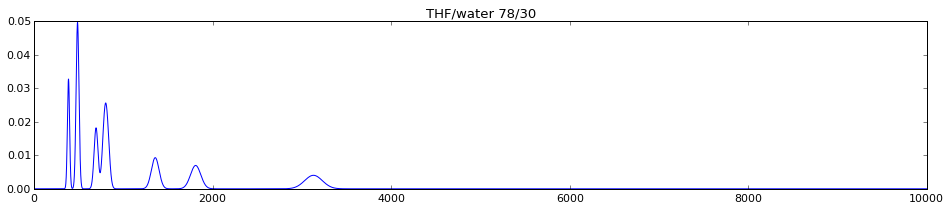

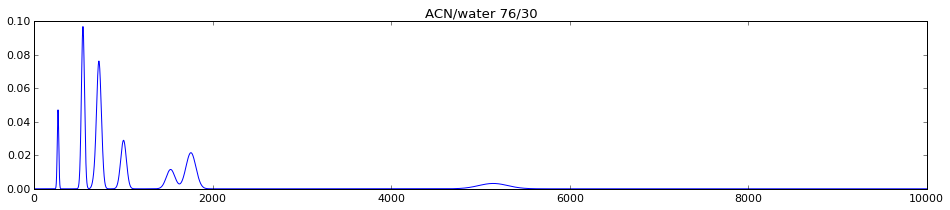

In [71]:
t = np.linspace(0,10000,10000)
m_g = np.array([1.0,0.3,3.0,2.3,4.2,2.0,1.4,3.0,1.3])

# THF
phi = 0.78 # optimized k
k_prime = k_prime_w*10**(-S_THF*phi)
print k_prime

t_m = L/u*60.0 #s
t_R = t_m*(1+k_prime)
sigma_t = t_R/np.sqrt(N)

t_R = t_R.reshape(9,1)
sigma_t = sigma_t.reshape(9,1)

y = 1.0/(sigma_t*np.sqrt(2.0*np.pi))*np.exp(-(t-t_R)**2/(2.0*sigma_t**2))

chrom = np.sum(y,axis=0)

fig = plt.figure(figsize=[16, 3])
plt.plot(t,chrom)
plt.title('THF/water 78/30')

# ACN
phi = 0.76 # optimized k
k_prime = k_prime_w*10**(-S_ACN*phi)
print k_prime

t_m = L/u*60.0 #s
t_R = t_m*(1+k_prime)
sigma_t = t_R/np.sqrt(N)

t_R = t_R.reshape(9,1)
sigma_t = sigma_t.reshape(9,1)
m_g = m_g.reshape(9,1)

y = m_g/(sigma_t*np.sqrt(2.0*np.pi))*np.exp(-(t-t_R)**2/(2.0*sigma_t**2))

chrom = np.sum(y,axis=0)

fig = plt.figure(figsize=[16, 3])
plt.plot(t,chrom)
plt.title('ACN/water 76/30')

## 2d
Try two different mixtures of the two solvent systems (THF/water and ACN/water) and examine whether you can improve the separation using mixtures of the two systems or whether one system is adequate. Define a parameter that acts as a measure of the optimum mixture.

1.2080126222
The optimum mixture appears to be a mixture of the two systems. The optimum mixture was determined by
maximizing the minimum resolution between peaks


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: divide by zero encountered in divide


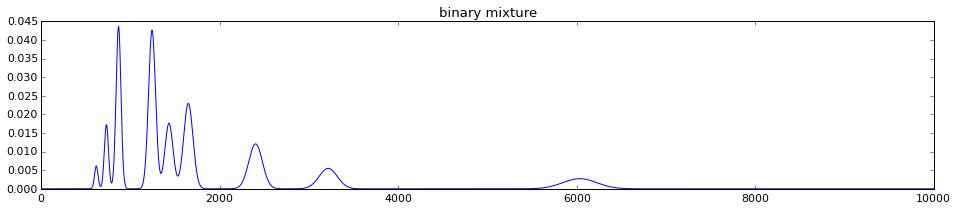

In [91]:
phi_THF = 0.7
phi_ACN = 0.73
c1 = 0.95
c2 = 1.0-c1
k_prime = k_prime_w*(c1*10**(-S_THF*phi_THF)+c2*10**(-S_ACN*phi_ACN))/(c1+c2)

t_m = L/u*60.0 #s
t_R = t_m*(1+k_prime)
sigma_t = t_R/np.sqrt(N)

t_R = t_R.reshape(9,1)
sigma_t = sigma_t.reshape(9,1)

y = m_g/(sigma_t*np.sqrt(2.0*np.pi))*np.exp(-(t-t_R)**2/(2.0*sigma_t**2))

chrom = np.sum(y,axis=0)

R = np.delete(np.abs((np.insert(t_R,0,0)-np.append(t_R,0))/(4*np.insert(sigma_t,0,0))),[0,9])
print min(R)

fig = plt.figure(figsize=[16, 3])
plt.plot(t,chrom)
plt.title('binary mixture')

print "The optimum mixture appears to be a mixture of the two systems. The optimum mixture was determined by"
print "maximizing the minimum resolution between peaks"